Epoch 1/5
247/247 - 9s - loss: 0.0297 - val_loss: 0.0370 - 9s/epoch - 37ms/step
Epoch 2/5
247/247 - 3s - loss: 0.0186 - val_loss: 0.0290 - 3s/epoch - 12ms/step
Epoch 3/5
247/247 - 3s - loss: 0.0142 - val_loss: 0.0259 - 3s/epoch - 11ms/step
Epoch 4/5
247/247 - 3s - loss: 0.0115 - val_loss: 0.0233 - 3s/epoch - 11ms/step
Epoch 5/5
247/247 - 3s - loss: 0.0098 - val_loss: 0.0192 - 3s/epoch - 12ms/step
Train Score: 0.02119 MSE (0.14558 RMSE)
Test Score: 0.01925 MSE (0.13874 RMSE)


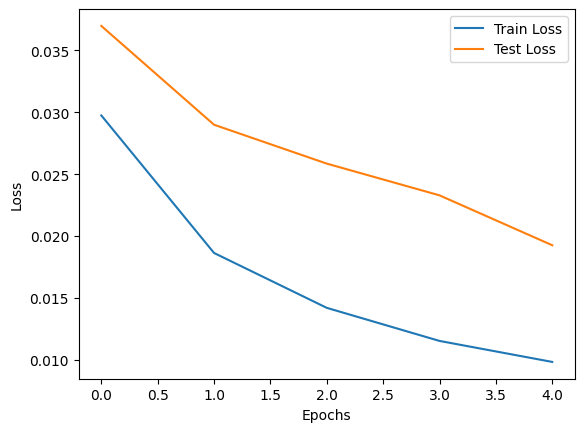

55/55 [==============================] - 1s 4ms/step


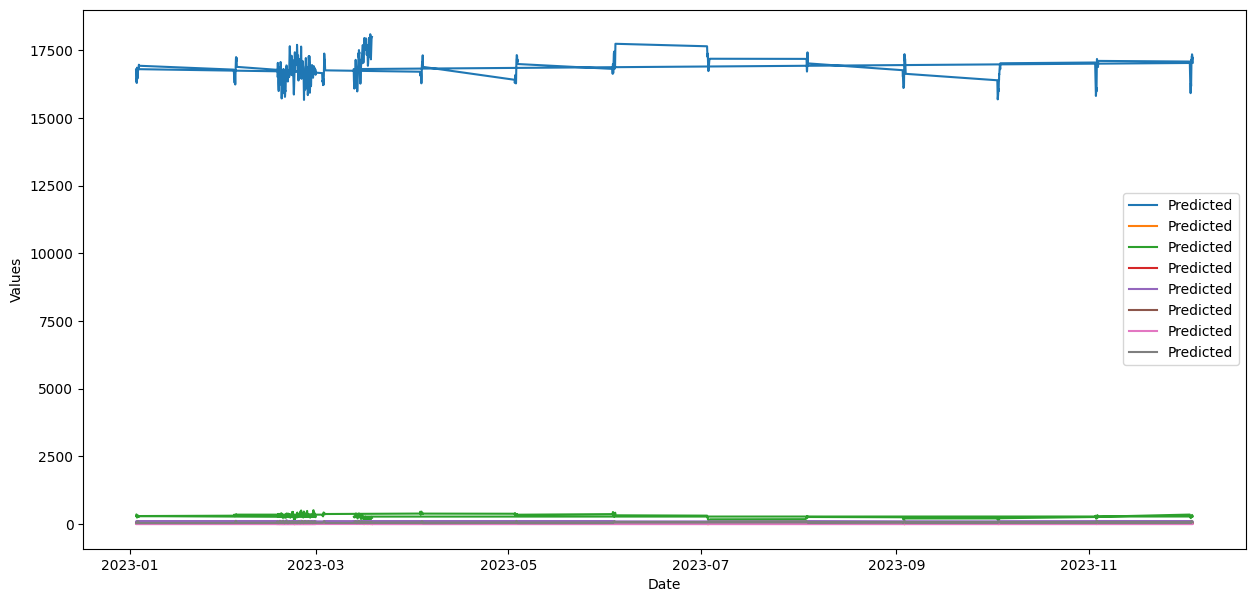

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your data
# Replace 'your_dataset.csv' with the name of your dataset file
data = pd.read_csv('kurla_cleaned.csv', parse_dates=['date'], index_col='date')

# Preprocess data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data into training and test sets
train_size = int(len(scaled_data) * 0.90)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Function to create input-output pairs for LSTM model
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# Create input-output pairs for training and test sets
look_back = 24
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 12))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 12))

# Create LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 12)))
model.add(Dense(12))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Evaluate the model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Score: {train_score:.5f} MSE ({np.sqrt(train_score):.5f} RMSE)')
print(f'Test Score: {test_score:.5f} MSE ({np.sqrt(test_score):.5f} RMSE)')

# Plot accuracy improvement during training
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict values for the last month
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


# Select the predicted and actual values for the last month


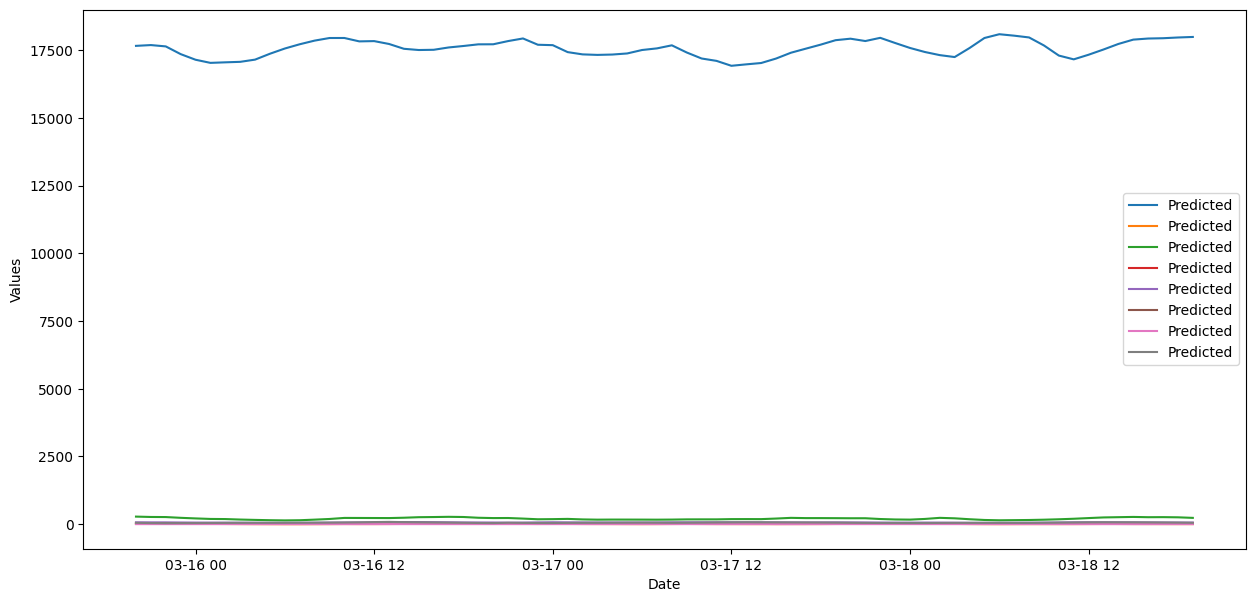

In [4]:

# Select the last month of data for plotting
last_month = data.iloc[-72:].index
pred_last_month = predictions[-72:, :8]
actual_last_month = data.iloc[-72:, :8].values

# Plot the predicted values for the last month
plt.figure(figsize=(15, 7))
plt.plot(last_month, pred_last_month, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()